<a href="https://colab.research.google.com/github/JazmineOrtiz/Simulaci-n-I/blob/main/Composici%C3%B3n_Tarea_def.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

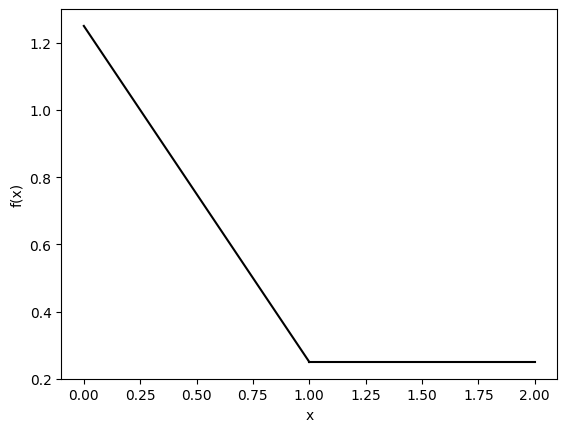

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los tramos de la función f(x)
X1 = np.linspace(0, 1, 50)
Y1 = (5/4) - X1

X2 = np.linspace(1, 2, 50)
Y2 = np.full_like(X2, 1/4)

x = [0, 1, 2]
y = [5/4, 1/4, 1/4]

# Graficar los tramos de la función
plt.figure()
plt.plot(X1, Y1, 'k')
plt.plot(X2, Y2, 'k')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.show()


In [4]:
#Comprobamos que la integral da 1

import sympy as sp

x = sp.symbols('x')

f = sp.Piecewise((5/4 - x, (x >= 0) & (x < 1)),
                 (1/4, (x >= 1) & (x <= 2)))

integral_result = sp.integrate(f, (x, 0, 2))

print(integral_result.evalf())


1.00000000000000


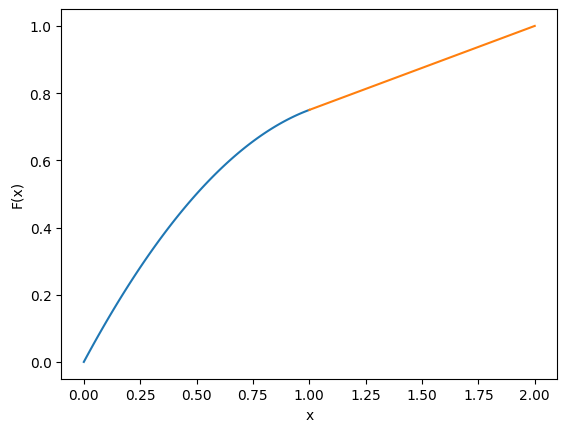

In [5]:
#Función acumulativa:

x = sp.symbols('x')
f1 = 5/4 - x
f2 = 1/4

# Calculamos las funciones acumulativas
F1 = sp.integrate(f1, (x, 0, x))
F2 = F1.subs(x, 1) + sp.integrate(f2, (x, 1, x))

F1_lambdified = sp.lambdify(x, F1)
F2_lambdified = sp.lambdify(x, F2)

# Definimos el rango de x para cada segmento
X1 = np.linspace(0, 1, 100)
X2 = np.linspace(1, 2, 100)

# Calculamos los valores acumulativos
Y1 = F1_lambdified(X1)
Y2 = F2_lambdified(X2)

# Graficamos las funciones acumulativas
plt.figure()

plt.plot(X1, Y1)
plt.plot(X2, Y2)

plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()



Usamos el método de Composición:

 Para $0 \leq x < 1$:
    \begin{equation}
    F(x) = \int_{0}^{x} \left( \frac{5}{4} - t \right) dt = \frac{5}{4}x - \frac{x^2}{2}
    \end{equation}
    
  Para $1 \leq x \leq 2$:
    \begin{equation}
    \begin{aligned}
    F(x) &= \left[ \frac{5}{4}x - \frac{x^2}{2} \right]_{0}^{1} + \int_{1}^{x} \frac{1}{4} dt \\
    &= \left( \frac{5}{4} - \frac{1}{2} \right) + \frac{1}{4}(x - 1) \\
    &= \frac{3}{4} + \frac{1}{4}(x - 1)
    \end{aligned}
    \end{equation}



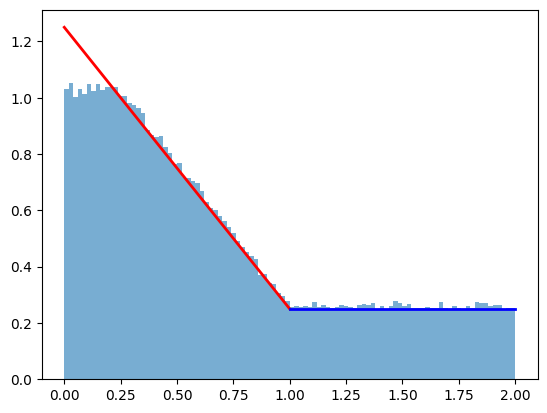

In [11]:
import random as rd

def funcion(N=500000):
    Lista = []
    for _ in range(N):
        u = rd.uniform(0, 1)
        y = rd.uniform(0, 2)

        if y < 1:
            f = (5/4) - y
        else:
            f = 1/4

        if u <= f:
            Lista.append(y)
    return Lista

# Generamos las muestras
F = funcion()

# Mostramos el histograma
plt.hist(F, bins=100, density=True, alpha=0.6)

# Añadimos la gráfica de las funciones de densidad originales para comparación
x1 = np.linspace(0, 1, 100)
y1 = (5/4) - x1
x2 = np.linspace(1, 2, 100)
y2 = np.full_like(x2, 1/4)

plt.plot(x1, y1, 'r-', lw=2)
plt.plot(x2, y2, 'b-', lw=2)
plt.show()
